In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data_dir = 'Data_categories/'
data_file = data_dir + 'all_articles.txt'

In [4]:
metadata = pd.read_csv(data_dir + "metadata.csv", index_col=0)

In [5]:
# load doc2vec vectors
vectors = np.load(data_dir + 'doc2vec_vectors.npy')
X = [i[0] for i in vectors] # the first element is the vector, the second one is just tag
y = metadata.category.values
categories = list(set(y))

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [51]:
X_2d = tsne.fit_transform(X)

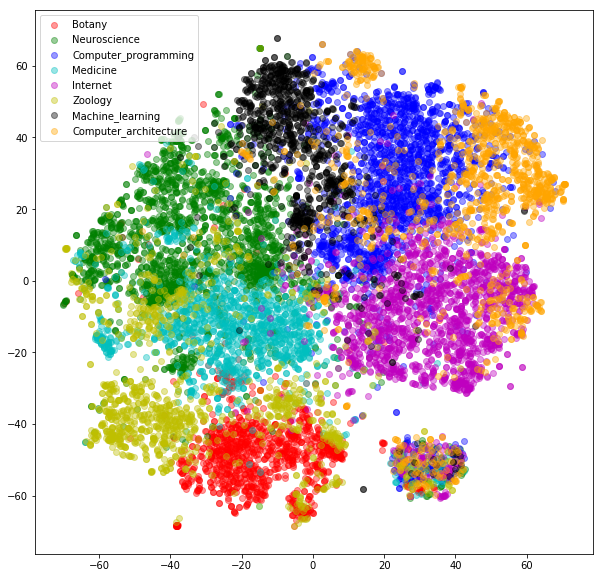

In [71]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange'
for label, c in zip(categories, colors):
    plt.scatter(X_2d[ y == label, 0], X_2d[y == label, 1], c=c, label=label, alpha=0.4)
plt.legend()
plt.show()

### Taking a look at the weird cluster in the lower right corner

In [74]:
x_axis = [coord[0] for coord in X_2d]
y_axis = [coord[1] for coord in X_2d]

In [83]:
metadata['x_axis'] = x_axis
metadata['y_axis'] = y_axis

In [84]:
metadata.head()

title                                        images category  \
0  Abiotic stress                                            []   Botany   
1          Botany                                            []   Botany   
2   Communication                                            []   Botany   
3   Carl Linnaeus                                            []   Botany   
4       Gardening  ['Forestgarden2.jpg', 'Urn, Palm House.JPG']   Botany   

      x_axis     y_axis  
0 -29.974714 -53.134541  
1 -28.342838 -43.675602  
2  10.247222 -19.381422  
3   1.117676 -58.086735  
4 -14.740436 -58.991093

In [86]:
weird_cluster = metadata[(metadata['x_axis'] >= 20) & (metadata['x_axis'] <= 45) & (metadata['y_axis'] >= -60) & (metadata['y_axis'] <= -40)]

In [90]:
weird_cluster

title images          category  \
127                                Microphylum     []            Botany   
138                               Infraspecies     []            Botany   
141                                  Magnorder     []            Botany   
143                                  Botanists     []            Botany   
146                                      Parks     []            Botany   
148                                    Gardens     []            Botany   
152                          Botanical gardens     []            Botany   
166                                 Herbicides     []            Botany   
192                          Organic gardening     []            Botany   
198              Physiological plant disorders     []            Botany   
222                             Paleobotanists     []            Botany   
243                         Prehistoric plants     []            Botany   
250                                   Arboreta     []            Botany   
253                        Domesticated plants     []            Botany   
320                             Garden centres     []            Botany   
355                         Building materials     []            Botany   
434                              Botanical art     []            Botany   
439                                 Herbalists     []            Botany   
444                         Nomen conservandum     []            Botany   
474                                Greenhouses     []            Botany   
493                        Floristic provinces     []            Botany   
541                             Phytopathology     []            Botany   
568                                    Herbals     []            Botany   
574                                  Herbalism     []            Botany   
583                                 Botanicals     []            Botany   
619                          Floristic regions     []            Botany   
642                               Infrakingdom     []            Botany   
649                                Fertilizers     []            Botany   
677                                   Herbaria     []            Botany   
721                           Gardening portal     []            Botany   
...                                        ...    ...               ...   
10603    Internet in the Republic of the Congo     []          Internet   
10625                      Internet in Nigeria     []          Internet   
10645                         Online self-harm     []          Internet   
10652                       Internet in Guinea     []          Internet   
10667                        Internet in Sudan     []          Internet   
10687                    Live streaming crimes     []          Internet   
10735                     Internet in Paraguay     []          Internet   
10741                                  Selfies     []          Internet   
10776                        Internet in Benin     []          Internet   
10780                      Internet in Bermuda     []          Internet   
10783                     Internet in Slovakia     []          Internet   
10791                  Internet in El Salvador     []          Internet   
10903                       Genetic algorithms     []  Machine_learning   
10969                        Bayesian networks     []  Machine_learning   
11178  Statistical natural language processing     []  Machine_learning   
11204               Multiple-instance learning     []  Machine_learning   
11237                           Decision trees     []  Machine_learning   
11291                         Graphical models     []  Machine_learning   
11292                          Markov networks     []  Machine_learning   
11308                            Markov models     []  Machine_learning   
11359                           Loss functions     []  Machine_learning   
11374                      Dimension reduction     []  Machine_lea

In [96]:
weird_cluster.index.values

array([  127,   138,   141,   143,   146,   148,   152,   166,   192,
         198,   222,   243,   250,   253,   320,   355,   434,   439,
         444,   474,   493,   541,   568,   574,   583,   619,   642,
         649,   677,   721,   751,   752,   763,   781,   782,   795,
         861,   896,   897,   901,   902,   903,   933,   960,   971,
         985,  1005,  1007,  1008,  1038,  1100,  1120,  1299,  1309,
        1323,  1324,  1349,  1355,  1373,  1376,  1379,  1398,  1427,
        1465,  1504,  1517,  1520,  1524,  1595,  1638,  1655,  1663,
        1688,  1702,  1704,  1713,  1760,  1773,  1782,  1783,  1791,
        1811,  1911,  1978,  2000,  2037,  2142,  2152,  2153,  2187,
        2192,  2203,  2266,  2277,  2278,  2292,  2337,  2394,  2650,
        2655,  2662,  2668,  2675,  2680,  2691,  2708,  2761,  2784,
        2810,  2820,  2824,  2826,  2887,  2889,  2919,  2924,  2945,
        3185,  3245,  3248,  3276,  3285,  3372,  3377,  3490,  3523,
        3637,  3766,

In [105]:
weird_articles = []
with open(data_file, 'r') as f:
    for i, line in enumerate(f):
        if i in weird_cluster.index.values:
            weird_articles.append(line)

In [106]:
weird_articles

['REDIRECT [[Subphylum]] [[Category:Botanical nomenclature]]\n',
 'REDIRECT [[Infraspecific name]] [[Category:Botanical nomenclature]]\n',
 'REDIRECT [[Order (biology)#Hierarchy_of_ranks]] [[Category:Botanical nomenclature]]\n',
 'REDIRECT [[List of botanists]]\n',
 'REDIRECT [[Park]]\n',
 'REDIRECT [[Garden]]\n',
 'REDIRECT [[Botanical garden]]\n',
 'REDIRECT [[Herbicide]]\n',
 'REDIRECT [[Organic horticulture]]\n',
 'REDIRECT [[Physiological plant disorder]]\n',
 'redirect [[Paleobotany]]\n',
 'REDIRECT [[Paleobotany]]\n',
 'REDIRECT [[Arboretum]]\n',
 'REDIRECT [[List of domesticated plants]]\n',
 'redirect [[Garden centre]]\n',
 'REDIRECT [[Building material]]\n',
 'REDIRECT [[Botanical illustration]]\n',
 'REDIRECT [[Herbal medicine]]\n',
 'REDIRECT [[Conserved name]] [[Category:Taxonomic synonyms]] [[Category:Taxonomy (biology)]] [[Category:Botanical nomenclature]] [[Category:Latin biological phrases]]\n',
 'REDIRECT [[Greenhouse]]\n',
 'REDIRECT [[Phytochorion]]\n',
 'REDIRECT [

Turnes out I overlooked some nonsence in the data, articles containing only redirects.